# Table of Contents
Introduction
Import
Analysis & Preprocessing
Model
Training
Analysis & Conclusion

# 1. Introduction
References:

- https://machinelearningmastery.com/feature-selection-for-regression-data/
- https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared#:~:text=MAE%3A%20It%20is%20not%20very,the%20weighted%20individual%20differences%20equally.

# 2. Import

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 3. Analysis & Preprocessing

In [2]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data_feat = pd.DataFrame(data, columns = data.columns[:-1])
data_feat = data_feat.drop(['S.No','Age'], axis=1)

data.head(5)
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(data_feat)
n = 20
pca = PCA(n_components=n)
pca_data = pca.fit_transform(x)

labels = data_feat.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_MeanThickness_thickness  CerebralWhiteMatterVol  \
0                       1.754401                1.293660   
1                       1.417516                1.506793   
2                       2.060537                1.356492   
3                       4.321472                1.316559   
4                       3.432616                1.645477   
...                          ...                     ...   
4221                    3.508241                2.349696   
4222                    4.445945               -2.409496   
4223                    8.016491                2.326575   
4224                   -0.596625                2.547033   
4225                   -2.307309               -3.481650   

      Left-Lateral-Ventricle  lh_pericalcarine_thickness  SurfaceHoles  \
0                   1.400115                   -1.478937     -1.847383   
1                   1.654055                   -0.614039     -1.384412   
2                   1.48905

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_pericalcarine_thickness,SurfaceHoles,CC_Posterior,rh_caudalanteriorcingulate_thickness,CC_Posterior,Right-Caudate,lh_parahippocampal_thickness,MaskVol-to-eTIV,Brain-Stem,Left-vessel,Right-vessel,non-WM-hypointensities,rh_isthmuscingulate_thickness,5th-Ventricle,non-WM-hypointensities,lh_rostralanteriorcingulate_thickness,5th-Ventricle
0,1.754401,1.293660,1.400115,-1.478937,-1.847383,2.537129,-1.131811,-0.411876,-0.365695,1.570148,-0.211262,0.181798,-1.580504,0.608887,-0.451223,0.448570,0.272656,-0.428067,0.644490,-0.308911
1,1.417516,1.506793,1.654055,-0.614039,-1.384412,2.360426,-1.435565,-0.852958,-0.769807,1.730512,0.200279,0.374897,-1.464860,0.247169,-0.836050,0.136242,-0.184904,-0.430852,1.096066,0.046217
2,2.060537,1.356492,1.489056,-1.055725,-1.174763,2.158388,-2.160262,-0.816436,-1.128342,1.477538,0.085750,0.332070,-0.931302,0.722037,-0.862200,0.412208,-0.445485,-0.149722,0.721634,0.376761
3,4.321472,1.316559,1.100276,-0.240485,-1.374596,2.403613,-1.136448,-1.573823,-0.828518,1.327238,0.307597,-0.370367,-1.351926,0.578170,-0.393221,0.097569,-0.217631,-0.288023,0.759698,0.241880
4,3.432616,1.645477,2.126718,-0.804346,-1.322060,3.067034,-1.201233,-0.821464,-0.529591,1.538776,-0.084633,0.413713,-1.465500,1.276663,-0.818454,-0.046595,0.336643,-0.417106,1.173832,-0.102437


In [4]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (3380, 20)
y_train shape is: (3380,) 

x_val shape is: (634, 20)
y_val shape is: (634,) 

x_test shape is: (212, 20)
y_test shape is: (212,)


# 4. Model

In [48]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1, activation='linear', name='output'))

opt = Adam(learning_rate=0.001)

model.compile(
            loss='mean_absolute_error',
            optimizer=opt,
            metrics= ['mean_absolute_error']
            )

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 32)                672       
                                                                 
 activation_46 (Activation)  (None, 32)                0         
                                                                 
 dense_47 (Dense)            (None, 16)                528       
                                                                 
 activation_47 (Activation)  (None, 16)                0         
                                                                 
 dense_48 (Dense)            (None, 8)                 136       
                                                                 
 activation_48 (Activation)  (None, 8)                 0         
                                                                 
 dense_49 (Dense)            (None, 4)               

# 5. Training

In [49]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=15, restore_best_weights = True)
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.001), 
    metrics=['msle']
)
# train the model
hist = model.fit(
    x_train, 
    y_train, 
    epochs=200, 
    batch_size=30,
    validation_data=(x_val, y_val), 
    callbacks = [earlystopping]
)

Epoch 1/200
113/113 [==============================] - 1s 7ms/step - loss: 6.5762 - msle: 6.5762 - val_loss: 2.4876 - val_msle: 2.4876
Epoch 2/200
113/113 [==============================] - 1s 5ms/step - loss: 1.2193 - msle: 1.2193 - val_loss: 0.4532 - val_msle: 0.4532
Epoch 3/200
113/113 [==============================] - 1s 6ms/step - loss: 0.3143 - msle: 0.3143 - val_loss: 0.2128 - val_msle: 0.2128
Epoch 4/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1826 - msle: 0.1826 - val_loss: 0.1570 - val_msle: 0.1570
Epoch 5/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1418 - msle: 0.1418 - val_loss: 0.1348 - val_msle: 0.1348
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1234 - msle: 0.1234 - val_loss: 0.1227 - val_msle: 0.1227
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1117 - msle: 0.1117 - val_loss: 0.1138 - val_msle: 0.1138
Epoch 8/200
113/113 [==============================] - 

113/113 [==============================] - 1s 6ms/step - loss: 0.0252 - msle: 0.0252 - val_loss: 0.0338 - val_msle: 0.0338
Epoch 62/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0248 - msle: 0.0248 - val_loss: 0.0349 - val_msle: 0.0349
Epoch 63/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0246 - msle: 0.0246 - val_loss: 0.0335 - val_msle: 0.0335
Epoch 64/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0245 - msle: 0.0245 - val_loss: 0.0333 - val_msle: 0.0333
Epoch 65/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0244 - msle: 0.0244 - val_loss: 0.0339 - val_msle: 0.0339
Epoch 66/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0241 - msle: 0.0241 - val_loss: 0.0334 - val_msle: 0.0334
Epoch 67/200
113/113 [==============================] - 1s 7ms/step - loss: 0.0241 - msle: 0.0241 - val_loss: 0.0332 - val_msle: 0.0332
Epoch 68/200
113/113 [==============================] - 1s 7m

# 6. Analysis & Conclusion

In [50]:
y_pred = model.predict(x_test)

print("Explained variance: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(y_test, y_pred)))

Explained variance: 0.8717352232991527
Max Error: 21.55675506591797
Mean absolute error: 5.381495745676868
Mean squared error: 51.230245823366204
Root Mean squared error: 7.157530707120033
R2: 0.8693401733894216


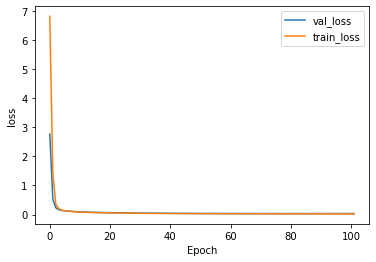

In [47]:
x = list(range(102))
vy = hist.history['val_loss']
ty = hist.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()